# Authors: Josephine Brozny, ...

# ** Determining total energy of a test flare**

 During this lab we will be writing code to determine the total energy of the X8.2-class flare that occured on September 10th, 2017.

Use the analysis plan that you developed last week to complete the following tasks:

> (1) Determine the baseline correction for the solar flare data. Make sure to answer Question 1.

> (2) Find the total energy of the flare by integrating the power as a function of time for the duration of the flare. Make sure to answer Question 2.

> (3) Document the code using markdown cells and comments to explain your procedure. **Save the colab file as a PDF and .ipynb file to turn in at the end of lab.** This is a **team assignment**. Everyone from the team should submit the ***same*** files.


To begin, first import the XRS longwave data of the X8.2-class solar flare that occured on September 10th, 2017 and download onto your personal computer. 



In [ ]:
import pandas as pd

solar_data = pd.read_csv('noaa_goes15_xrs_1m_91017.csv')     # Import data using pandas library

display(solar_data)       # Display the dataframe of the solar data


,time (milliseconds since 1970-01-01),longwave (W/m^2)
0,1.505036e+12,1.557950e-06
1,1.505036e+12,1.509740e-06
2,1.505037e+12,1.466140e-06
3,1.505037e+12,1.427330e-06
4,1.505037e+12,1.385810e-06
...,...,...
1351,1.505117e+12,4.998270e-07
1352,1.505118e+12,4.977100e-07
1353,1.505118e+12,4.933680e-07
1354,1.505118e+12,4.928320e-07


The solar flare data is in the units of solar irradiance ($\frac{W}{m^2}$). Here, we calculate the solar flare data in energy per second ($ergs/s$) and time from milliseconds to seconds--this should look similar to the code you wrote for the lab in Week 6. In addition, we change the time from elasped time from January 1st, 1970 to elasped time from the first data point.

In [ ]:
import numpy as np

# Calculate power in ergs/s
w2erg = 10**7 # Conversion factors from watts to ergs per second
int_m2 = 4*np.pi*(1.496*10**11)**2 # area to integrate over
solar_data['longwave (W/m^2)'] = solar_data['longwave (W/m^2)']*w2erg*int_m2
# Rename dataframe
solar_data = solar_data.rename(columns={'longwave (W/m^2)': 'longwave (ergs/s)'})


# Convert miliseconds to seconds
solar_data['time (milliseconds since 1970-01-01)'] = solar_data['time (milliseconds since 1970-01-01)']/1000
# Rename dataframe
solar_data = solar_data.rename(columns={'time (milliseconds since 1970-01-01)': 'time (s)'})

# Calculate elasped time from first data point
solar_data.iloc[:,0] = solar_data.iloc[:,0]-solar_data.iloc[0,0]

##### Display data frame #####
display(solar_data)

,time (s),longwave (ergs/s)
0,0.0,4.381538e+24
1,60.0,4.245953e+24
2,120.0,4.123334e+24
3,180.0,4.014185e+24
4,240.0,3.897416e+24
...,...,...
1351,81060.0,1.405700e+24
1352,81120.0,1.399747e+24
1353,81180.0,1.387535e+24
1354,81240.0,1.386028e+24



Next, plot the solar flare data as energy per second ($ergs/s$) versus time ($seconds$). Again, this code should look similar to the code you wrote in Week 6.




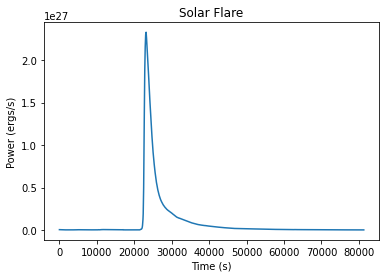

In [ ]:
import matplotlib.pyplot as plt

plt.plot(solar_data.iloc[:,0], solar_data.iloc[:,1])  # Plot the solar data. Remember how "iloc" works?
plt.title("Solar Flare")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (s)")

plt.show()

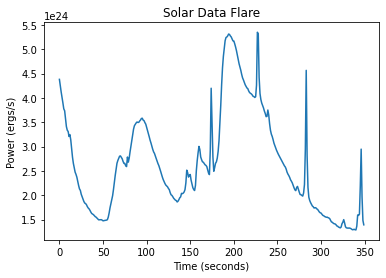

In [ ]:
import matplotlib.pyplot as plt

plt.plot(solar_data.iloc[0:350,1])
plt.title("Solar Data Flare")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (seconds)")
plt.show()

# **Task 1: Basline correction**

One of the primary challenges in determining the total energy of the flare is the "background." That is, we have to take into account the baseline level of X-rays that was present even before the flare began, to make sure we are only determining the *new* energy created by the flare itself. 


## ***Question 1: Which method do you plan to use for the September 10th flare? Why did you choose this method? Create a new markdown cell below to answer these questions.***


Our group plans to use method one for baseline correction since it is best equipped for the size of the data and duration of the flare.

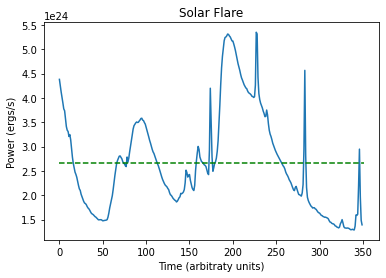

2.6727170094129095e+24

In [ ]:
import statistics as stats
import matplotlib.pyplot as plt

plt.plot(solar_data.iloc[0:350,1])
plt.title("Solar Flare")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitraty units)")

# Take the average
avg_baseline = solar_data.iloc[0:350,1].mean()

x_coordinates = [0, 351]
y_coordinates = [avg_baseline, avg_baseline]
plt.plot(x_coordinates, y_coordinates, 'g--')

plt.show()
display(avg_baseline)


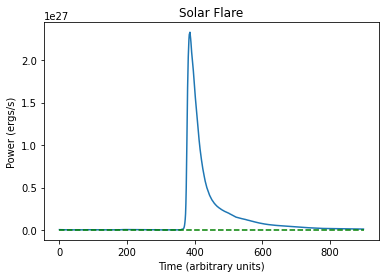

In [ ]:
import matplotlib.pyplot as plt

plt.plot(solar_data.iloc[0:900,1])
plt.title("Solar Flare")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")

x_coordinates = [0, 900]
y_coordinates = [avg_baseline, avg_baseline]
plt.plot(x_coordinates, y_coordinates, 'g--')

plt.show()

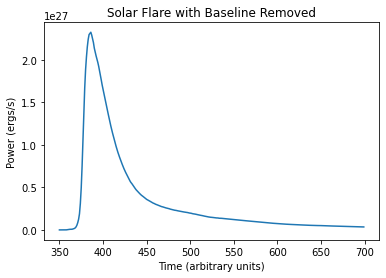

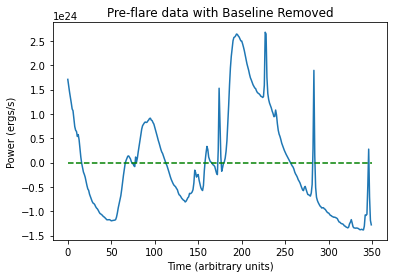

In [ ]:
solar_flare_blremov = solar_data['longwave (ergs/s)'].subtract(avg_baseline)

plt.plot(solar_flare_blremov[350:700])
plt.title("Solar Flare with Baseline Removed")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")
plt.show()

# make another plot zoomed in on pre-flare
plt.plot(solar_flare_blremov[0:350])
plt.title("Pre-flare data with Baseline Removed")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")
x_coordinates = [0, 350]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, 'g--')
plt.show()

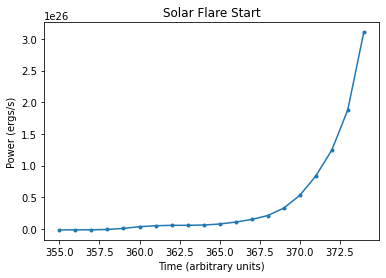

In [ ]:
plt.plot(solar_flare_blremov[355:375], '.-')
plt.title("Solar Flare Start")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")
plt.show()

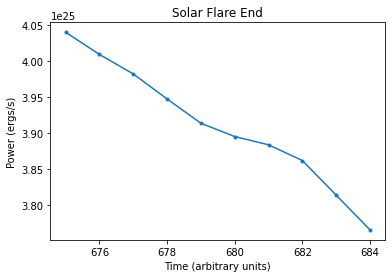

In [ ]:
plt.plot(solar_flare_blremov[675:685], '.-')
plt.title("Solar Flare End")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")
plt.show()

# **Task 2: Reporting total energy**


Once you have adjusted for the background x-rays, determine the total energy of the flare. Make sure to use the appropiate limits for integration so that you only integrate over the time of the flare itself. You can do this by indexing the `y` and `x` in integration function. 

## ***Question 2: Describe how you are reporting the total energy produced by the flare. Which Pythons functions are you using? What do those functions do? Create a new markdown cell below to answer this.***

We will be using the trapezoidal integration code with baseline correction.  Bounds of integration are between the start and end of the flare (366-680)

In [ ]:
import scipy.integrate as integrate

A_wblc = integrate.trapz(solar_flare_blremov.iloc[366:680], solar_data.iloc[366:680,0])

print('\n Total area under the curve with baseline correction: ', A_wblc, ' ergs')


 Total area under the curve with baseline correction:  7.083781415302346e+30  ergs
